<a href="https://colab.research.google.com/github/egonloch/DNC/blob/main/Case_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [98]:
#Target:

#Churn — Cliente deu churn ou não

#Variáveis numéricas:

#Tenure — Número de meses que o cliente está na base
#MonthlyCharges — A quantia consumida por cliente mensalmente
#TotalCharges — A quantia consumida por cliente total

#Variáveis categóricas:

#CustomerID - Id do cliente
#Gender — M/F
#SeniorCitizen — Se o cidadão é ou não idoso (0,1)
#Partner — Se o cliente é ou não casado
#Dependents — Cliente tem dependentes (Yes, No)
#PhoneService — Cliente tem serviço telefonico (Yes, No)
#MulitpleLines — Se o cliente tem várias linhas ou não (Yes, No, No Phone Service)
#InternetService — Tipo do serviço de internet (DSL, Fiber Optic, None)
#OnlineSecurity — Se o cliente tem segurança online (Yes, No, No Internet Service)
#OnlineBackup — WSe o cliente tem Backup Online (Yes, No, No Internet Service)
#DeviceProtection — Se o cliente tem proteção do dispositivo (Yes, No, No Internet Service)
#TechSupport — Se o cliente tem suporte tecnológico (Yes, No, No Internet Service)
#StreamingTV — Se o cliente tem streaming de TV (Yes, No, No Internet Service)
#StreamingMovies — Se o cliente tem serviço de streaming de filmes (Yes, No, No Internet Service)
#Contract — Termo de contrato do cliente (Monthly, 1-Year, 2-Year)
#PaperlessBilling — Se o cliente tem ou não boleto sem papel (Yes, No)
#PaymentMethod — Método de pagamento do cliente(E-Check, Mailed Check, Bank Transfer (Auto), Credit Card (Auto))

In [99]:
churn = pd.read_excel("churn_data.xlsx")
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Understanding

In [100]:

churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [101]:
churn.isna().count()

customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
dtype: int64

In [102]:
churn_agg = churn.groupby("Churn")['customerID'].count().reset_index()
churn_agg = pd.DataFrame(churn_agg)
churn_agg

,Churn,customerID
0,No,5163
1,Yes,1869


<Axes: xlabel='Churn', ylabel='customerID'>

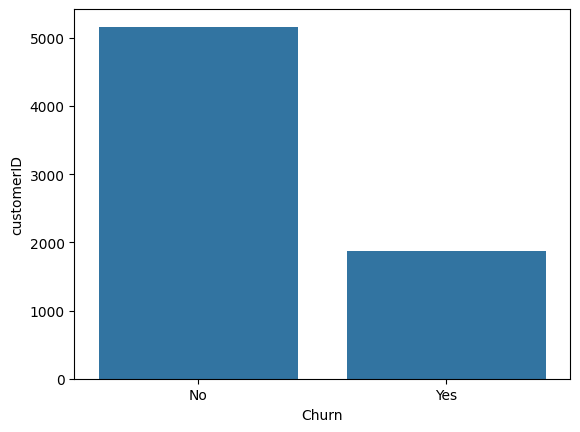

In [103]:
sns.barplot(data=churn_agg, x = "Churn",y = "customerID")

In [104]:
churn_agg = churn.groupby("PaymentMethod")['customerID'].count().reset_index()
churn_agg = pd.DataFrame(churn_agg)
churn_agg

,PaymentMethod,customerID
0,Bank transfer (automatic),1542
1,Credit card (automatic),1521
2,Electronic check,2365
3,Mailed check,1604


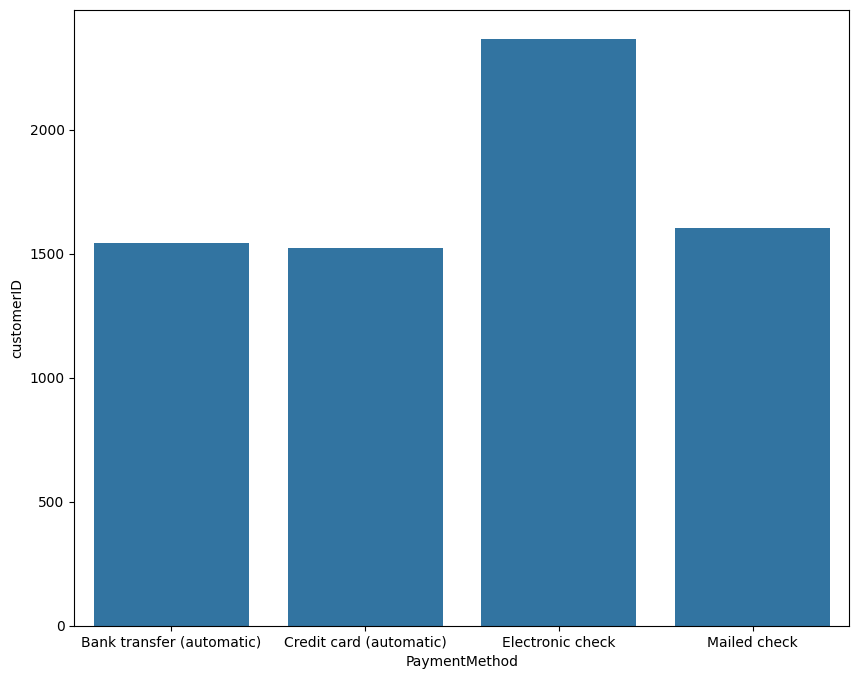

In [105]:
plt.figure(figsize=[10,8])
sns.barplot(data=churn_agg, x = "PaymentMethod",y = "customerID");

In [106]:
churn_agg_gender = churn.groupby("gender")['customerID'].count().reset_index()
churn_agg_gender = pd.DataFrame(churn_agg_gender)
churn_agg_gender

,gender,customerID
0,Female,3483
1,Male,3549


In [107]:
churn_agg_pgt = churn.groupby(["Churn","PaymentMethod"])['customerID'].count().reset_index()
churn_agg_pgt.head()

,Churn,PaymentMethod,customerID
0,No,Bank transfer (automatic),1284
1,No,Credit card (automatic),1289
2,No,Electronic check,1294
3,No,Mailed check,1296
4,Yes,Bank transfer (automatic),258


In [108]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [109]:
churn.dropna(inplace=True)

In [110]:
churn["TotalCharges"] = pd.to_numeric(churn["TotalCharges"],errors='coerce')

In [111]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [112]:
X = churn.drop(columns=["customerID","Churn"], axis=1)

y = churn[["Churn"]]

In [113]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y.Churn)
y.Churn = le.transform(y.Churn)

<ipython-input-113-83a630f6e413>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.Churn = le.transform(y.Churn)


In [114]:
X = pd.get_dummies(X)

In [115]:
# Import the necessary sklearn method
from sklearn.preprocessing import MinMaxScaler
# Instantiate a Min-Max scaling object
mm = MinMaxScaler()
# Fit and transform our feature data into a pandas dataframe
X = pd.DataFrame(mm.fit_transform(X))

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

# Regressão Logística

In [117]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr = model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [118]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1])

In [119]:
X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
3318,0.0,0.380282,0.019900,0.059607,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
6811,1.0,0.436620,0.617413,0.284358,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0
4661,0.0,0.704225,0.021891,0.118146,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
5346,0.0,0.661972,0.767662,0.510789,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
204,0.0,0.605634,0.503483,0.339274,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3858,0.0,0.000000,0.057214,0.000600,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
6149,0.0,0.014085,0.013930,0.001431,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
6462,0.0,0.239437,0.017910,0.037745,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
2360,1.0,0.239437,0.752736,0.199065,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0


In [120]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.8064087978763747
Acurácia (Teste): 0.8060295790671217
Acurácia Balanceada (Treino): 0.7261952744603342
Acurácia Balanceada (Teste): 0.7162243301923877
Precision (Treino): 0.6621276595744681
Precision (Teste): 0.6730769230769231
Recall (Treino): 0.5549215406562055
Recall (Teste): 0.5246252676659529
F1-Score (Treino): 0.6038028715560729
F1-Score (Teste): 0.5896510228640193
ROCAUC (Treino): 0.8448625450949647
ROCAUC (Teste): 0.851664546348713


# Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier

rf =  RandomForestClassifier()

In [122]:
rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [123]:
rf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [124]:
X_test.assign(churn = y_test).assign(label = rf.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
3318,0.0,0.380282,0.019900,0.059607,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
6811,1.0,0.436620,0.617413,0.284358,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0
4661,0.0,0.704225,0.021891,0.118146,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
5346,0.0,0.661972,0.767662,0.510789,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
204,0.0,0.605634,0.503483,0.339274,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3858,0.0,0.000000,0.057214,0.000600,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
6149,0.0,0.014085,0.013930,0.001431,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
6462,0.0,0.239437,0.017910,0.037745,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
2360,1.0,0.239437,0.752736,0.199065,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0


In [125]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.9977246871444824
Acurácia (Teste): 0.7895335608646189
Acurácia Balanceada (Treino): 0.997312907475743
Acurácia Balanceada (Teste): 0.6926921182225156
Precision (Treino): 0.9950142450142451
Precision (Teste): 0.6358543417366946
Recall (Treino): 0.9964336661911555
Recall (Teste): 0.4860813704496788
F1-Score (Treino): 0.9957234497505346
F1-Score (Teste): 0.5509708737864077
ROCAUC (Treino): 0.9999370917874111
ROCAUC (Teste): 0.8260283265632438


In [128]:
# Importamos GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [100, 300, 500]}

grid_search = GridSearchCV(rf, parameters, scoring='accuracy', cv=5, n_jobs=-1)

In [129]:
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='accuracy')

In [138]:
dict = grid_search.best_estimator_.get_params()
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [139]:
from sklearn.ensemble import RandomForestClassifier

rf_tunned =  RandomForestClassifier(bootstrap = True, ccp_alpha = 0.0,
                                     class_weight = None, criterion= 'gini',
                                     max_depth = 7, max_features='sqrt',
                                     max_leaf_nodes = None,
                                     max_samples = None,
                                     min_impurity_decrease = 0.0,
                                     min_samples_leaf = 1,
                                     min_samples_split = 2,
                                     min_weight_fraction_leaf = 0.0,
                                     n_estimators = 300, n_jobs = None,
                                     oob_score = False, random_state = None,
                                     verbose = 0, warm_start = False)
rf_tunned

RandomForestClassifier(max_depth=7, n_estimators=300)

In [141]:
rf_tunned.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=7, n_estimators=300)

In [142]:
rf_tunned.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [143]:
X_test.assign(churn = y_test).assign(label = rf_tunned.predict(X_test))

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,churn,label
3318,0.0,0.380282,0.019900,0.059607,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
6811,1.0,0.436620,0.617413,0.284358,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,0
4661,0.0,0.704225,0.021891,0.118146,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
5346,0.0,0.661972,0.767662,0.510789,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
204,0.0,0.605634,0.503483,0.339274,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3858,0.0,0.000000,0.057214,0.000600,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
6149,0.0,0.014085,0.013930,0.001431,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0
6462,0.0,0.239437,0.017910,0.037745,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
2360,1.0,0.239437,0.752736,0.199065,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0


In [144]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf_tunned.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf_tunned.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf_tunned.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf_tunned.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf_tunned.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf_tunned.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf_tunned.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.819491846795601
Acurácia (Teste): 0.7969283276450512
Acurácia Balanceada (Treino): 0.7230478375048632
Acurácia Balanceada (Teste): 0.6888432020726591
Precision (Treino): 0.725
Precision (Teste): 0.6729559748427673
Recall (Treino): 0.5171184022824536
Recall (Teste): 0.4582441113490364
F1-Score (Treino): 0.6036636136552873
F1-Score (Teste): 0.5452229299363057
ROCAUC (Treino): 0.8860717533099115
ROCAUC (Teste): 0.8496907431949404
